In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
from tkinter import filedialog
import cv2

 # dataset path

In [39]:
data_dir = r"C:\Users\sivar\Downloads\archive\tea sickness dataset"

# Image preprocessing and augmentation with validation split

In [40]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=20, 
                             width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_generator = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=32, 
                                              class_mode='categorical', subset='training')
valid_generator = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=32, 
                                              class_mode='categorical', subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [41]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

# Build the CNN model

In [42]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model

In [45]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=20, callbacks=[early_stopping])

C:\Users\sivar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.1385 - loss: 3.1165 - val_accuracy: 0.2989 - val_loss: 1.9292
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.2961 - loss: 1.7187 - val_accuracy: 0.4080 - val_loss: 1.3251
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.4273 - loss: 1.2647 - val_accuracy: 0.4080 - val_loss: 1.2113
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.4483 - loss: 1.1525 - val_accuracy: 0.4195 - val_loss: 1.1574
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.4614 - loss: 1.1173 - val_accuracy: 0.3563 - val_loss: 1.2236
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.4669 - loss: 1.1865 - val_accuracy: 0.4368 - val_loss: 1.1870
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.4988 - loss: 1.0741 - val_accuracy: 0.6034 - val_loss: 1.0816
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.5055 - loss: 1.0636 - val_accuracy: 0.5920 - v

# Evaluate the model

In [46]:
test_loss, test_acc = model.evaluate(valid_generator)
print(f"Test Accuracy: {test_acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6776 - loss: 0.7796
Test Accuracy: 0.69


# Plot training results

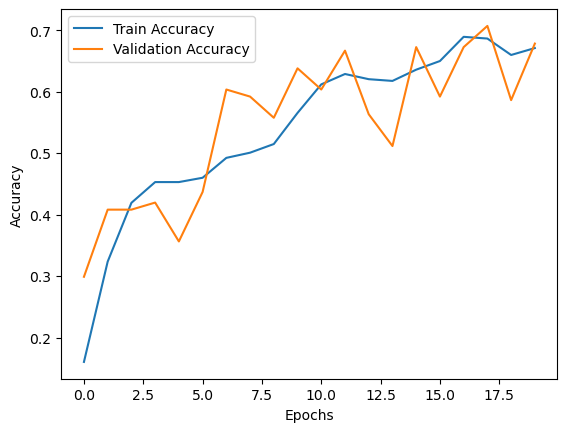

In [47]:
# Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model

In [48]:
model.save("tea_leaf_disease_model.h5")

In [49]:
model = load_model("tea_leaf_disease_model.h5")


#  creating a Function to predict an image

In [56]:
def predict_image():
    file_path = r"C:\Users\sivar\Downloads\archive\tea sickness dataset\red leaf spot\UNADJUSTEDNONRAW_thumb_1eb.jpg"
    img = load_img(file_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


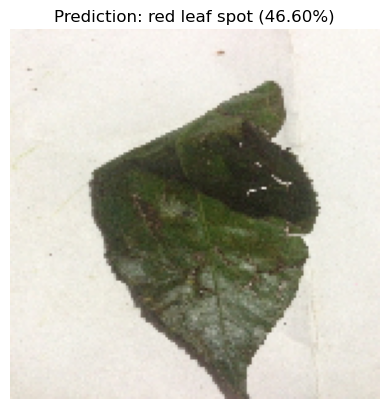

In [57]:
predict_image()
